<a href="https://colab.research.google.com/github/Mohit1-K/Heart-Disease-prediction/blob/main/Heart_disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Work/framingham.csv")

In [ ]:
dataset.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [ ]:
print(round(dataset.isnull().sum().sum()*100/len(dataset)))

15


## **Only 15% entries are null values, so we can drop them.**

In [ ]:
dataset.dropna(axis=0, inplace = True)

In [ ]:
dataset.drop(columns=['education'], axis=1, inplace= True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3658 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3658 non-null   int64  
 1   age              3658 non-null   int64  
 2   currentSmoker    3658 non-null   int64  
 3   cigsPerDay       3658 non-null   float64
 4   BPMeds           3658 non-null   float64
 5   prevalentStroke  3658 non-null   int64  
 6   prevalentHyp     3658 non-null   int64  
 7   diabetes         3658 non-null   int64  
 8   totChol          3658 non-null   float64
 9   sysBP            3658 non-null   float64
 10  diaBP            3658 non-null   float64
 11  BMI              3658 non-null   float64
 12  heartRate        3658 non-null   float64
 13  glucose          3658 non-null   float64
 14  TenYearCHD       3658 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 457.2 KB


In [ ]:
dataset.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,0.443685,49.551941,0.489065,9.025424,0.030344,0.005741,0.311646,0.027064,236.847731,132.370558,82.917031,25.782802,75.730727,81.852925,0.152269
std,0.496886,8.562029,0.499949,11.921590,0.171557,0.075561,0.463229,0.162292,44.097681,22.086866,11.974258,4.065601,11.981525,23.904164,0.359331
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.875000,90.000000,28.037500,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


### **Distribution of features**

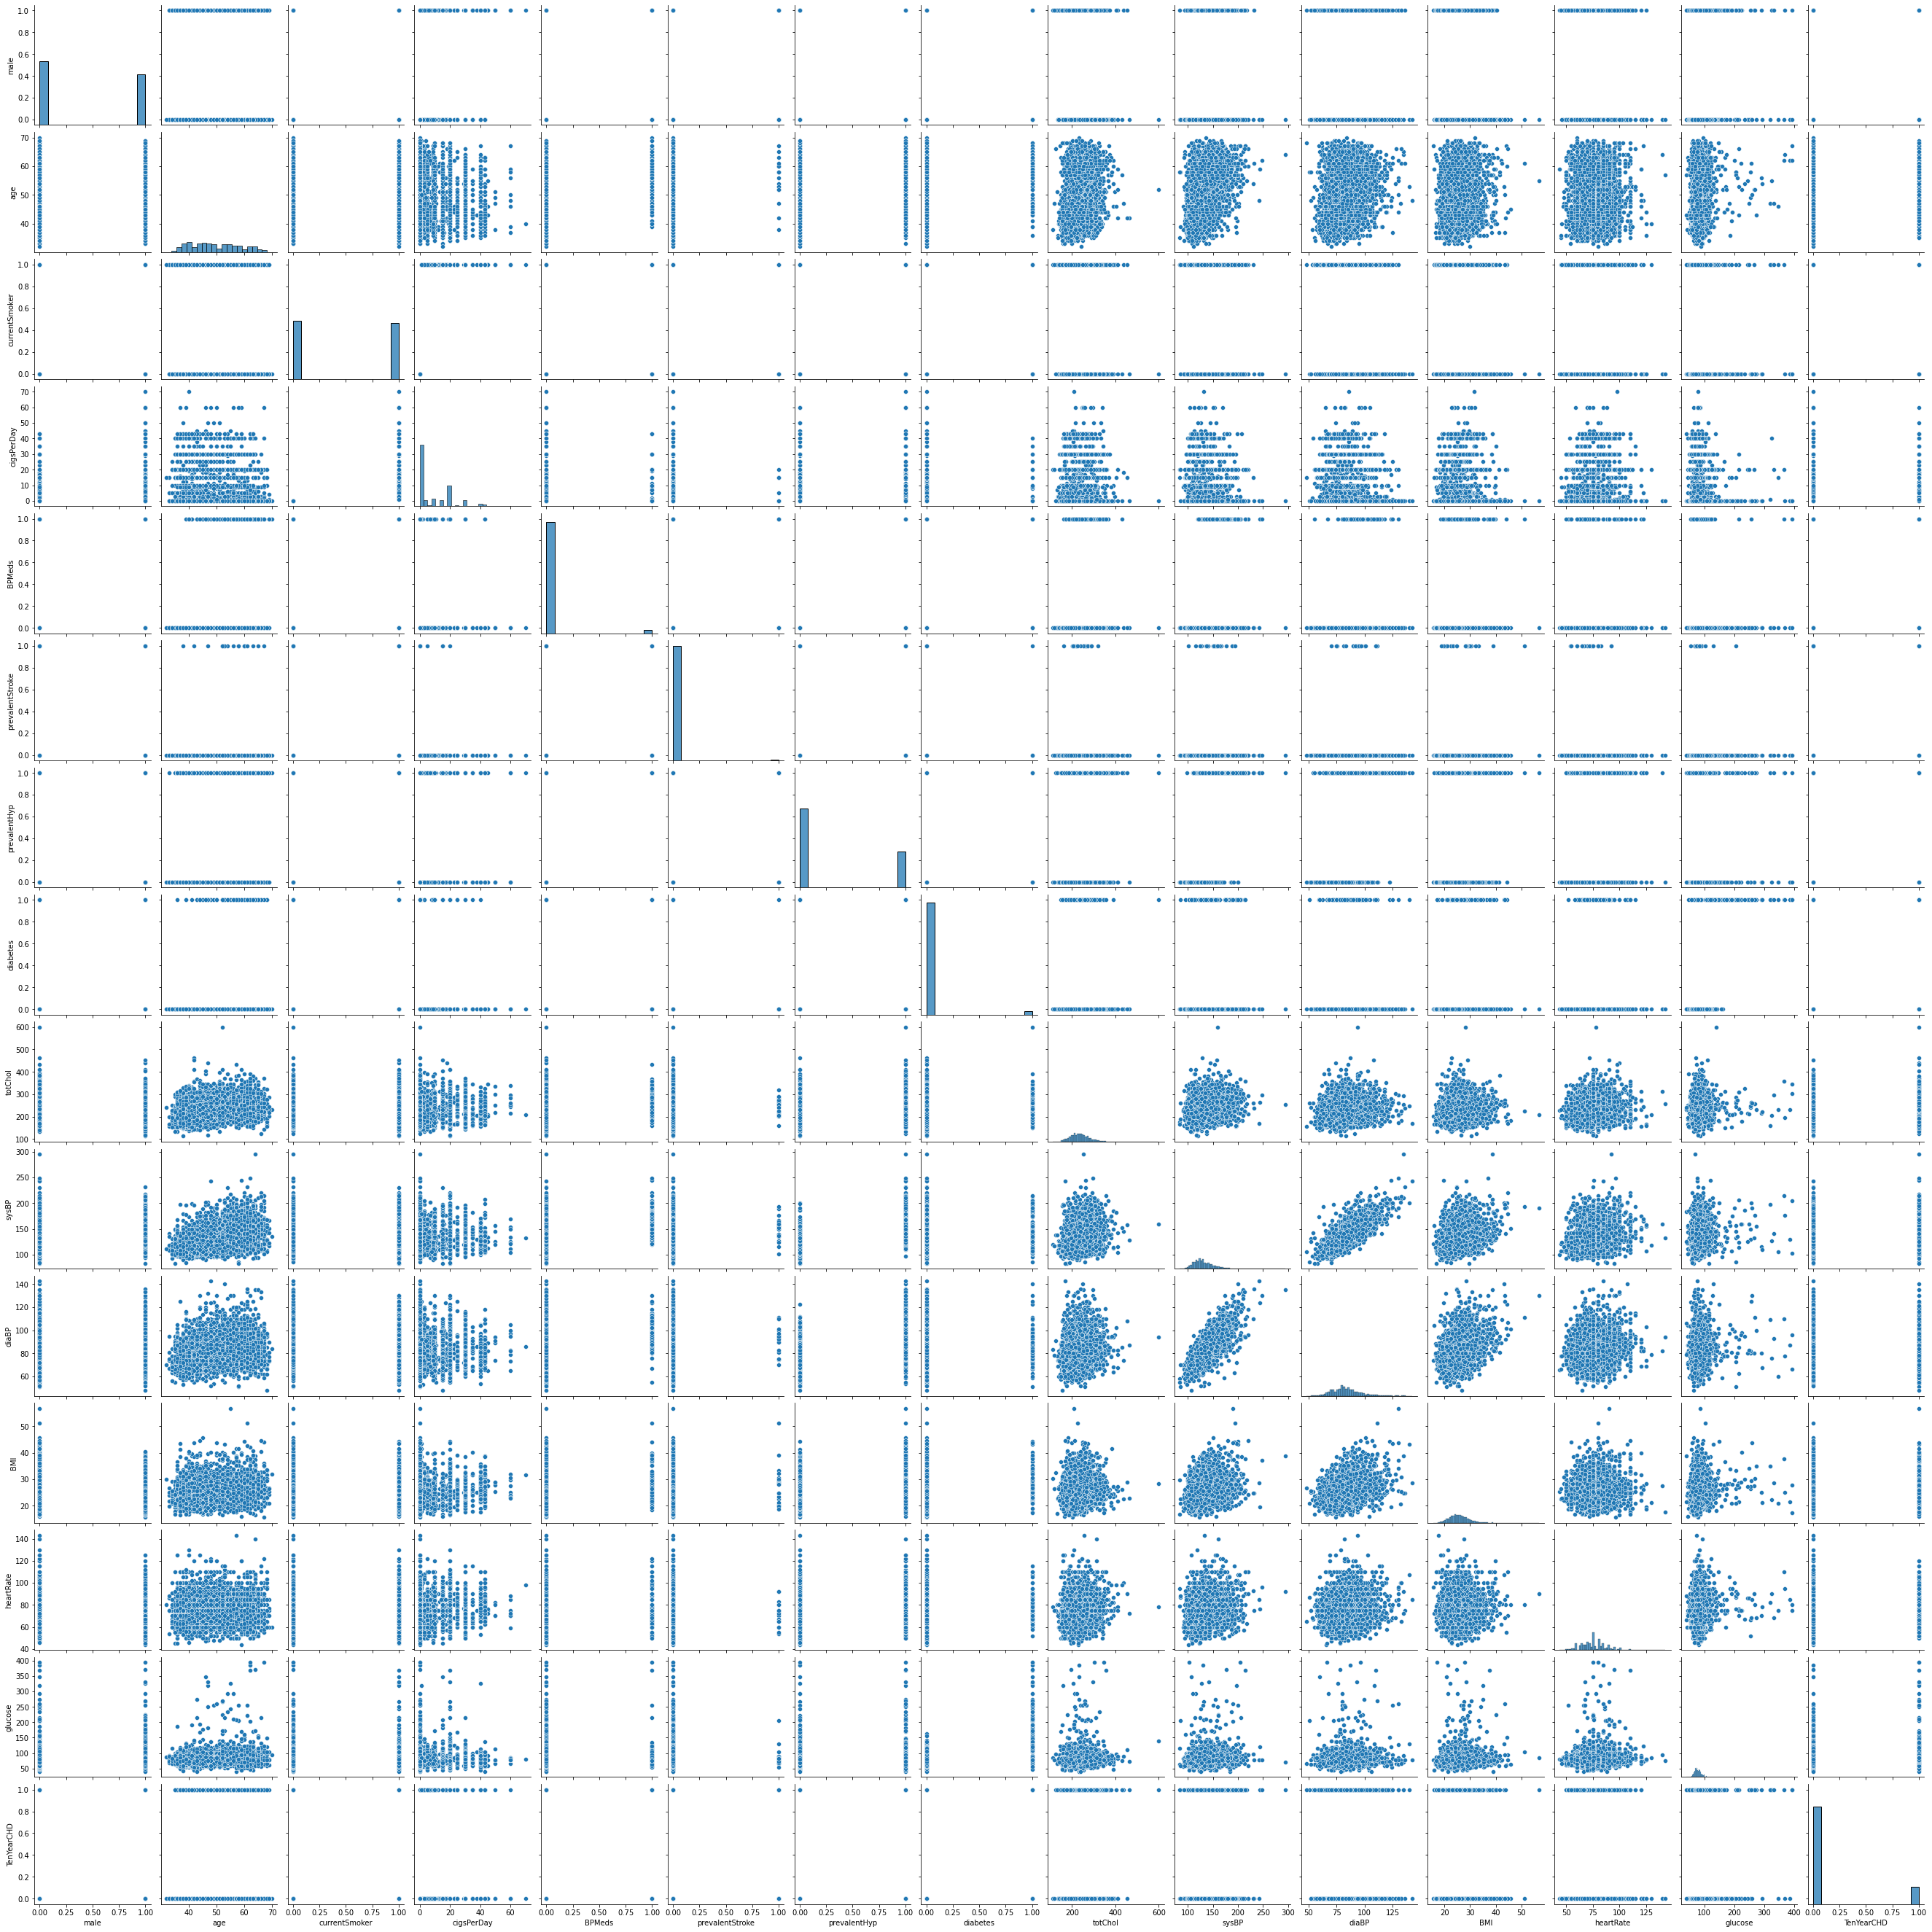

In [ ]:
sns.pairplot(dataset)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


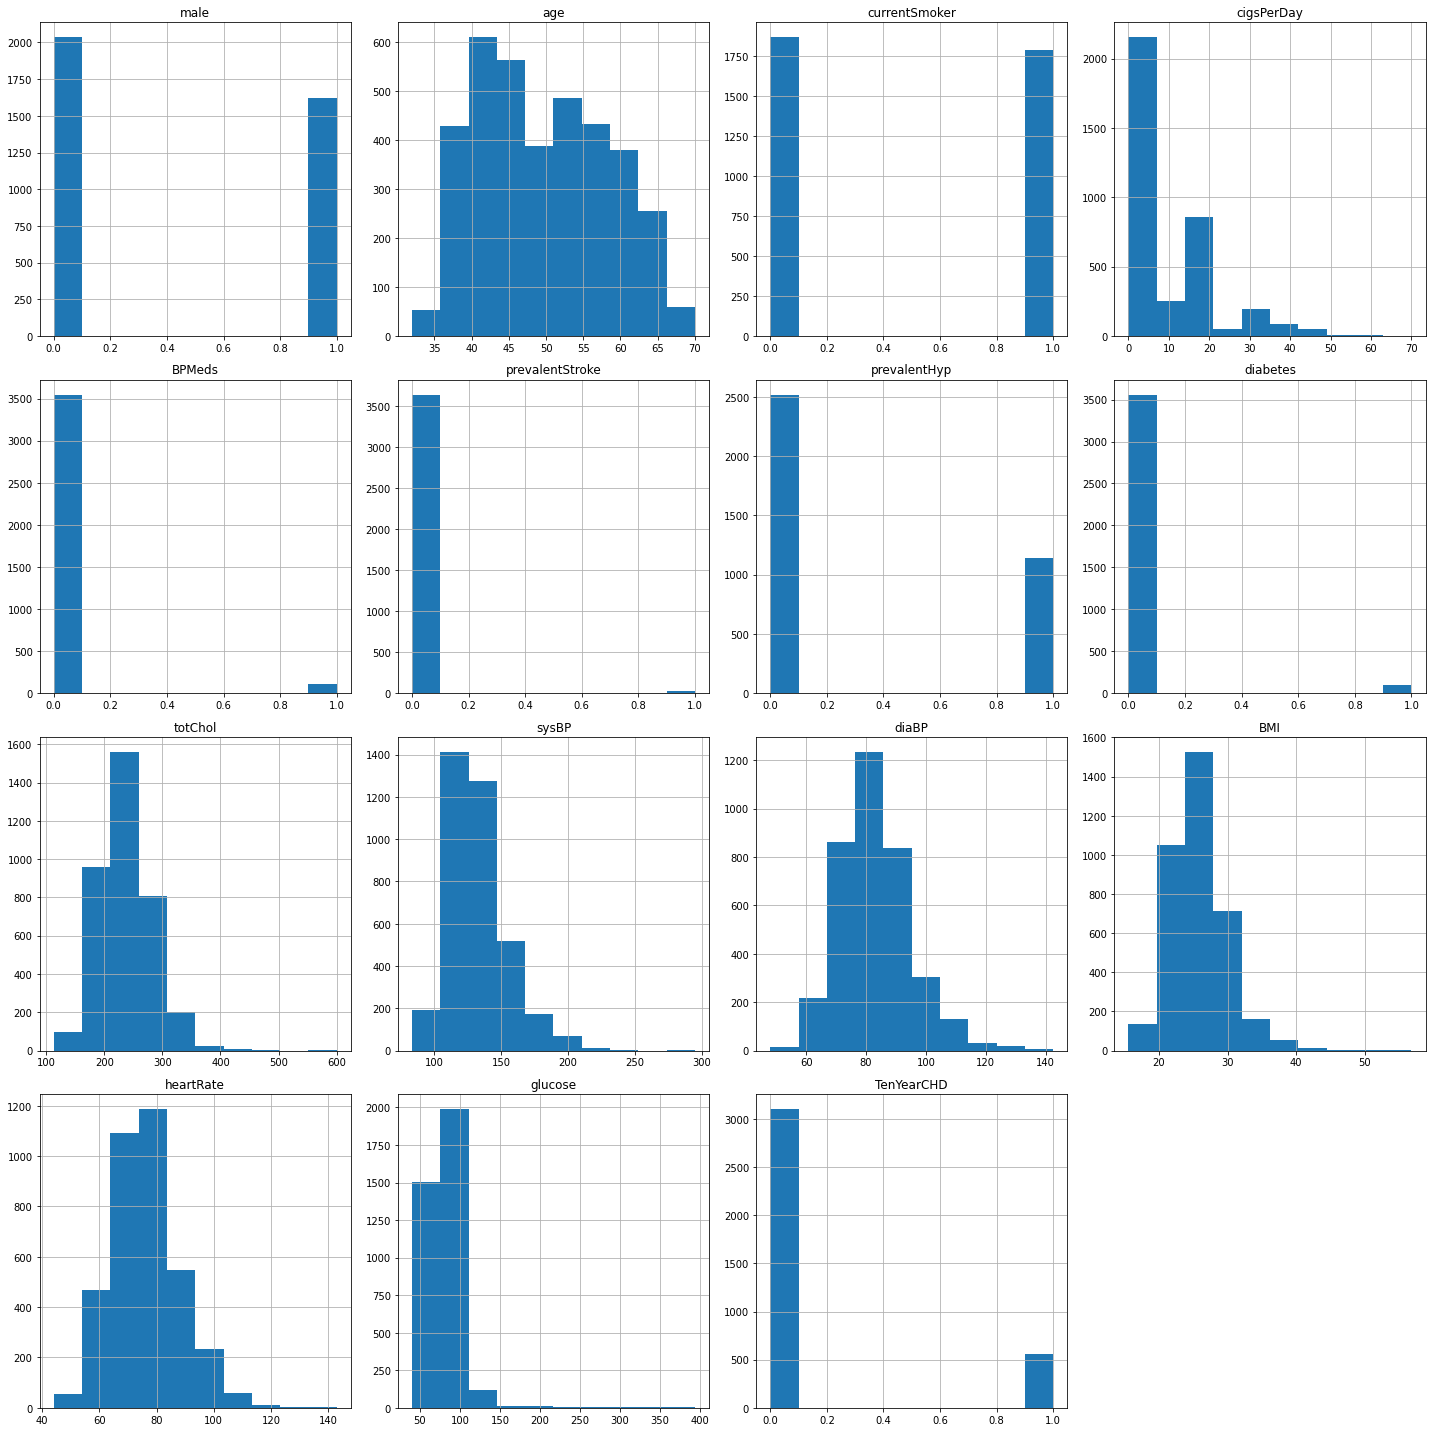

In [ ]:
def dataset_histogram(dataframe, features, rows, columns):
  fig= plt.figure(figsize=(20,20))
  for i, feature in enumerate(features):
    ax=fig.add_subplot(rows,columns, i+1)
    dataframe[features].hist(bins=10, ax=ax)
    ax.set_title(feature)
  fig.tight_layout()
  plt.show()

dataset_histogram(dataset, dataset.columns,6,3)

### **Finding correlation**

In [ ]:
dataset.corr()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.024412,0.206114,0.330322,-0.052124,-0.002312,0.001424,0.013819,-0.070321,-0.045358,0.051872,0.073111,-0.115285,0.002940,0.091688
age,-0.024412,1.000000,-0.210771,-0.189295,0.134732,0.050893,0.306239,0.109092,0.268252,0.388267,0.208283,0.137511,-0.002722,0.118349,0.233983
currentSmoker,0.206114,-0.210771,1.000000,0.773913,-0.051923,-0.038150,-0.108078,-0.041849,-0.051034,-0.134428,-0.115955,-0.159821,0.050841,-0.053242,0.019165
cigsPerDay,0.330322,-0.189295,0.773913,1.000000,-0.046504,-0.036286,-0.070460,-0.036961,-0.030400,-0.094781,-0.056746,-0.087395,0.064030,-0.053726,0.052014
BPMeds,-0.052124,0.134732,-0.051923,-0.046504,1.000000,0.113125,0.262910,0.049066,0.094083,0.271263,0.199630,0.105642,0.012889,0.054232,0.089152
prevalentStroke,-0.002312,0.050893,-0.038150,-0.036286,0.113125,1.000000,0.066057,0.009625,0.012736,0.061070,0.055834,0.036496,-0.017019,0.016061,0.048366
prevalentHyp,0.001424,0.306239,-0.108078,-0.070460,0.262910,0.066057,1.000000,0.080556,0.166655,0.697675,0.617734,0.302949,0.146818,0.086942,0.181387
diabetes,0.013819,0.109092,-0.041849,-0.036961,0.049066,0.009625,0.080556,1.000000,0.048451,0.102552,0.050686,0.089009,0.060984,0.614820,0.093431
totChol,-0.070321,0.268252,-0.051034,-0.030400,0.094083,0.012736,0.166655,0.048451,1.000000,0.219925,0.174422,0.121056,0.093053,0.049884,0.091338
sysBP,-0.045358,0.388267,-0.134428,-0.094781,0.271263,0.061070,0.697675,0.102552,0.219925,1.000000,0.786669,0.330917,0.184797,0.134651,0.222821


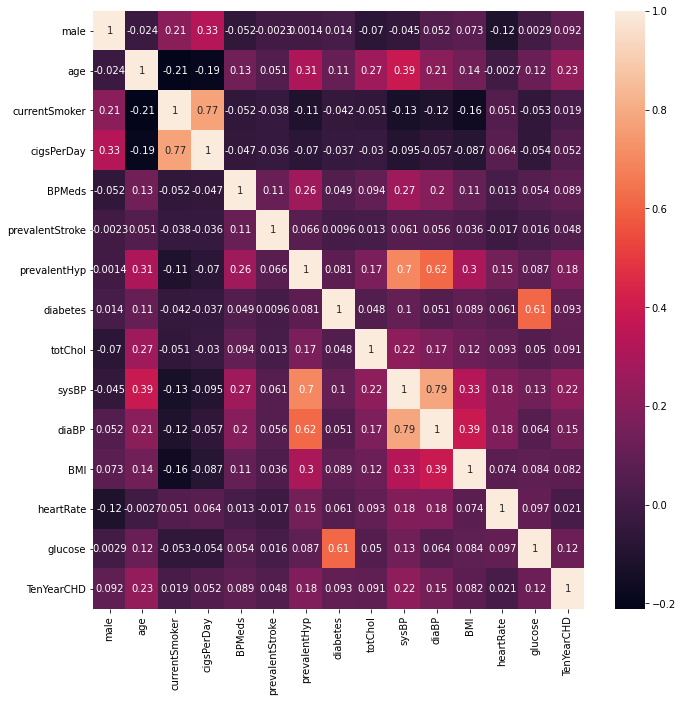

In [ ]:
f, ax = plt.subplots(figsize =(11, 11))
sns.heatmap(dataset.corr(),annot=True, ax=ax)

In [ ]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
scale.fit_transform(dataset)

array([[ 1.11975484, -1.23257968, -0.97836413, ...,  0.35637003,
        -0.20304365, -0.42381538],
       [-0.89305263, -0.41490473, -0.97836413, ...,  1.60846859,
        -0.24488308, -0.42381538],
       [ 1.11975484, -0.18128332,  1.02211434, ..., -0.06099616,
        -0.49591969, -0.42381538],
       ...,
       [-0.89305263,  0.28595951, -0.97836413, ...,  0.35637003,
         1.05213942, -0.42381538],
       [ 1.11975484, -1.11576897, -0.97836413, ..., -0.72878206,
        -0.41224082, -0.42381538],
       [-0.89305263, -1.23257968,  1.02211434, ...,  0.77373621,
        -0.07752534, -0.42381538]])

**As we can see that some of the variables like "currentSmoker", "cigsPerDay", "heartRate" are not highly correlated with "TenYearCHD" but still they affects the result.**

In [ ]:
dataset.TenYearCHD.value_counts()

0    3101
1     557
Name: TenYearCHD, dtype: int64

**557 Patients are suffering heart disease and 3101 patients are not suffering heart disease while data of 645 patients is not available.**

In [ ]:
new_dataset=dataset[['age','male','cigsPerDay','diabetes','totChol',
                     'sysBP','diaBP','BMI','glucose','TenYearCHD']]

In [ ]:
X = new_dataset.iloc[:,:-1]
y = new_dataset.iloc[:,-1]

# **Model Building**

In [ ]:
from sklearn.linear_model import LogisticRegression
Le= LogisticRegression()
from sklearn.model_selection import train_test_split,GridSearchCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=10)

### **Hyperparameters tuning**

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
 
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
 
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=Le, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
model = grid_search.fit(X_train, y_train)

In [ ]:
pred= np.array(model.predict(X_test))
print(len(pred))

732


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       605
           1       0.91      0.08      0.14       127

    accuracy                           0.84       732
   macro avg       0.87      0.54      0.53       732
weighted avg       0.85      0.84      0.78       732



In [ ]:
print(accuracy_score(y_test, pred))

0.8387978142076503


In [ ]:
confusion_matrix(y_test, pred)

array([[604,   1],
       [117,  10]])

True Positive: 10,
True Negative: 604,
False Positive: 1,
False Negative: 117

## **Trying more algorithms**

### **Gradient boosting classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model2 = GradientBoostingClassifier()
model2.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
pred2 = np.array(model2.predict(X_test))

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       605
           1       0.68      0.10      0.18       127

    accuracy                           0.84       732
   macro avg       0.76      0.55      0.54       732
weighted avg       0.81      0.84      0.78       732



Gradient boosting classifier gives 83% accuracy.

### **Random Forest**

In [ ]:
param_grid = {  'bootstrap': [True],
              'max_depth': [5, 10, None],
              'max_features': ['log2'],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]
              }

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()

g_search = GridSearchCV(estimator = model3, param_grid = param_grid, 

                          cv = 3, n_jobs = 1, verbose = 0)
model3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred3 = np.array(model3.predict(X_test))

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(classification_report(y_test, pred3))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       605
           1       0.77      0.08      0.14       127

    accuracy                           0.84       732
   macro avg       0.80      0.54      0.53       732
weighted avg       0.83      0.84      0.78       732



RandomForestClassifier gives 84% accuracy.